# Arewa Data Science Academy
## Deep Learning Cohort2.0
## Name: Umar Lawan Sani
### Email: umarfarouq447@gmail.com
### Title: Week 2 Solution
## Exercises Solution

In [1]:
# Import necessary libraries
import torch
from torch import nn
import matplotlib.pyplot as plt


In [2]:
# Setup device-agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

## 1. Create a straight line dataset using the linear regression formula (`weight * X + bias`).
  * Set `weight=0.3` and `bias=0.9` there should be at least 100 datapoints total.
  * Split the data into 80% training, 20% testing.
  * Plot the training and testing data so it becomes visual.

Your output of the below cell should look something like:
```
Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])
```

Of course the numbers in `X` and `y` may be different but ideally they're created using the linear regression formula.

In [4]:
# Create the data parameters
weight = 0.3
bias = 0.9

X = torch.arange(0, 1, 0.01)
y = weight * X + bias

# Make X and y using linear regression feature


print(f"Number of X samples: {len(X)}")
print(f"Number of y samples: {len(y)}")
print(f"First 10 X & y samples:\nX: {X[:10]}\ny: {y[:10]}")

Number of X samples: 100
Number of y samples: 100
First 10 X & y samples:
X: tensor([0.0000, 0.0100, 0.0200, 0.0300, 0.0400, 0.0500, 0.0600, 0.0700, 0.0800,
        0.0900])
y: tensor([0.9000, 0.9030, 0.9060, 0.9090, 0.9120, 0.9150, 0.9180, 0.9210, 0.9240,
        0.9270])


In [5]:
# Split the data into training and testing
# Create train/test split
train_split = int(0.8 * len(X)) # 80% of data used for training set, 20% for testing
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]

len(X_train), len(y_train), len(X_test), len(y_test)

(80, 80, 20, 20)

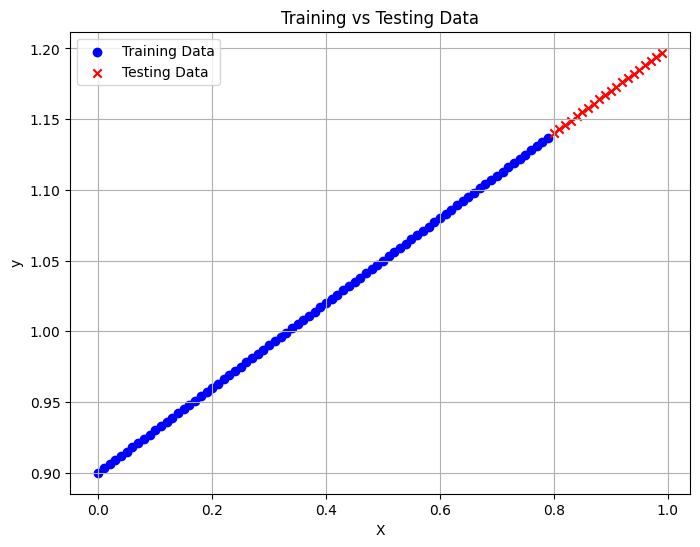

In [8]:
# Plot the training and testing data
plt.figure(figsize=(8, 6))

# Plot training data (blue circles)
plt.scatter(X_train.numpy(), y_train.numpy(), label="Training Data", color="blue", marker="o")

# Plot testing data (red crosses)
plt.scatter(X_test.numpy(), y_test.numpy(), label="Testing Data", color="red", marker="x")

# Add labels and title
plt.xlabel("X")
plt.ylabel("y")
plt.title("Training vs Testing Data")

# Add legend and grid
plt.legend()
plt.grid(True)

# Show the plot
plt.show()



## 2. Build a PyTorch model by subclassing `nn.Module`.
  * Inside should be a randomly initialized `nn.Parameter()` with `requires_grad=True`, one for `weights` and one for `bias`.
  * Implement the `forward()` method to compute the linear regression function you used to create the dataset in 1.
  * Once you've constructed the model, make an instance of it and check its `state_dict()`.
  * **Note:** If you'd like to use `nn.Linear()` instead of `nn.Parameter()` you can.

In [10]:
# Create PyTorch linear regression model by subclassing nn.Module
class LinearRegression(nn.Module):
  def __init__(self):
    super().__init__()
    self.weight = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))
    self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))


  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weight * x + self.bias

In [11]:
# Instantiate the model and put it to the target device
model = LinearRegression().to(device)

## 3. Create a loss function and optimizer using `nn.L1Loss()` and `torch.optim.SGD(params, lr)` respectively.
  * Set the learning rate of the optimizer to be 0.01 and the parameters to optimize should be the model parameters from the model you created in 2.
  * Write a training loop to perform the appropriate training steps for 300 epochs.
  * The training loop should test the model on the test dataset every 20 epochs.

In [14]:
# Create the loss function
loss_fn = nn.L1Loss()

# Create the optimizer
optimizer = torch.optim.SGD(params = model.parameters(), lr=0.01)

In [15]:
# Step 1: Send Data to Target Device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Set number of epochs
epochs = 300

# Step 2: Training Loop
for epoch in range(epochs):
    ### Training
    model.train()  # Put model in train mode

    # 1. Forward pass
    y_pred = model(X_train)

    # 2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    # 3. Zero gradients
    optimizer.zero_grad()

    # 4. Backpropagation
    loss.backward()

    # 5. Step the optimizer
    optimizer.step()

    ### Perform testing every 20 epochs
    if (epoch + 1) % 20 == 0:  # Check every 20 epochs
        model.eval()  # Put model in evaluation mode
        with torch.no_grad():  # Setup inference context
            # 1. Forward pass on test data
            y_test_pred = model(X_test)

            # 2. Calculate test loss
            test_loss = loss_fn(y_test_pred, y_test)

        # Print out what's happening
        print(f"Epoch: {epoch+1} | Train loss: {loss.item():.3f} | Test loss: {test_loss.item():.3f}")


Epoch: 20 | Train loss: 0.436 | Test loss: 0.584
Epoch: 40 | Train loss: 0.404 | Test loss: 0.659
Epoch: 60 | Train loss: 0.385 | Test loss: 0.708
Epoch: 80 | Train loss: 0.372 | Test loss: 0.739
Epoch: 100 | Train loss: 0.362 | Test loss: 0.756
Epoch: 120 | Train loss: 0.353 | Test loss: 0.764
Epoch: 140 | Train loss: 0.345 | Test loss: 0.765
Epoch: 160 | Train loss: 0.338 | Test loss: 0.761
Epoch: 180 | Train loss: 0.331 | Test loss: 0.753
Epoch: 200 | Train loss: 0.324 | Test loss: 0.744
Epoch: 220 | Train loss: 0.317 | Test loss: 0.731
Epoch: 240 | Train loss: 0.310 | Test loss: 0.716
Epoch: 260 | Train loss: 0.303 | Test loss: 0.701
Epoch: 280 | Train loss: 0.296 | Test loss: 0.686
Epoch: 300 | Train loss: 0.290 | Test loss: 0.670


## 4. Make predictions with the trained model on the test data.
  * Visualize these predictions against the original training and testing data (**note:** you may need to make sure the predictions are *not* on the GPU if you want to use non-CUDA-enabled libraries such as matplotlib to plot).

In [16]:
# Make predictions with the model
model.eval()
with torch.no_grad():
  y_preds = model(X_test)

In [17]:
# Plot the predictions (these may need to be on a specific device)
y_test_pred = y_test_pred.cpu()  # Move to CPU for plotting
X_test_cpu = X_test.cpu()  # Move X_test to CPU for plotting

# Print first 10 predictions for reference
print("First 10 Predictions:\n", y_test_pred[:10])

First 10 Predictions:
 tensor([1.6738, 1.6912, 1.7085, 1.7259, 1.7432, 1.7606, 1.7780, 1.7953, 1.8127,
        1.8301])


## 5. Save your trained model's `state_dict()` to file.
  * Create a new instance of your model class you made in 2. and load in the `state_dict()` you just saved to it.
  * Perform predictions on your test data with the loaded model and confirm they match the original model predictions from 4.

In [18]:
from pathlib import Path

# 1. Create models directory
MODEL_DIR = Path("models")
MODEL_DIR.mkdir(exist_ok=True)

# 2. Create model save path
MODEL_PATH = MODEL_DIR / "linear_regression.pth"

# 3. Save the model state dict
torch.save(model.state_dict(), MODEL_PATH)

print(f"Model state_dict saved to: {MODEL_PATH}")

Model state_dict saved to: models/linear_regression.pth


In [19]:
# Create new instance of model and load saved state dict (make sure to put it on the target device)

loaded_model = LinearRegression().to(device)  # Move to the target device

loaded_model.load_state_dict(torch.load(MODEL_PATH))

loaded_model.eval()  # Important for inference

print("Model successfully loaded onto device and ready for predictions!")


Model successfully loaded onto device and ready for predictions!


<ipython-input-19-b54150166ee2>:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  loaded_model.load_state_dict(torch.load(MODEL_PATH))


In [20]:
# Make predictions with loaded model and compare them to the previous

with torch.no_grad():
    y_test_pred_loaded = loaded_model(X_test.to(device))


y_test_pred_loaded = y_test_pred_loaded.cpu()
y_test_pred = y_test_pred.cpu()  # Ensure previous predictions are also on CPU


predictions = torch.allclose(y_test_pred, y_test_pred_loaded, atol=1e-6)

print(f"Do the predictions match? {predictions}")


Do the predictions match? True
